<a href="https://colab.research.google.com/github/saipragna25/deep-learning-asgn-neural-networks-/blob/main/DL_NN_with_tensorflow_variants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Non-linear regression using tensorflow low level API

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Define the equation for generating synthetic data
def equation(x1, x2, x3):
    return 2 * x1 ** 2 - 3 * x2 ** 3 + 4 * x3

In [3]:
# Define the equation for generating synthetic data
def generate_data(n_samples):
    x1 = np.random.uniform(-1, 1, size=(n_samples,))
    x2 = np.random.uniform(-1, 1, size=(n_samples,))
    x3 = np.random.uniform(-1, 1, size=(n_samples,))
    y = equation(x1, x2, x3) + 0.1 * np.random.randn(n_samples)
    return x1, x2, x3, y


In [4]:
# Generate the data
x1_train, x2_train, x3_train, y_train = generate_data(n_samples=1000)

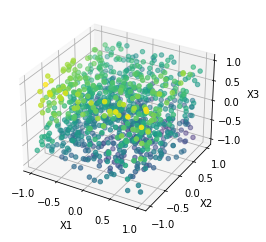

In [5]:
# Plot the synthetic data using a 4D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_train, x2_train, x3_train, c=y_train)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

In [6]:
# Define the model architecture
x = tf.compat.v1.placeholder(tf.float32, shape=[None, 3], name='x')
y = tf.compat.v1.placeholder(tf.float32, shape=[None, 1], name='y')
W1 = tf.Variable(tf.random_normal([3, 16]), name='W1')
b1 = tf.Variable(tf.zeros([16]), name='b1')
W2 = tf.Variable(tf.random_normal([16, 8]), name='W2')
b2 = tf.Variable(tf.zeros([8]), name='b2')
W3 = tf.Variable(tf.random_normal([8, 1]), name='W3')
b3 = tf.Variable(tf.zeros([1]), name='b3')
hidden_1 = tf.nn.relu(tf.einsum('ij,jk->ik', x, W1) + b1)
hidden_2 = tf.nn.relu(tf.einsum('ij,jk->ik', hidden_1, W2) + b2)
output_layer = tf.einsum('ij,jk->ik', hidden_2, W3) + b3
loss = tf.reduce_mean(tf.square(output_layer - y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

In [7]:
# Train the model
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1000):
    _, loss_val = sess.run([optimizer, loss], feed_dict={x: np.column_stack([x1_train, x2_train, x3_train]), y: y_train.reshape(-1, 1)})
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss_val:.4f}')

Epoch 0, Loss: 10.0689
Epoch 100, Loss: 1.3254
Epoch 200, Loss: 0.7854
Epoch 300, Loss: 0.5719
Epoch 400, Loss: 0.4407
Epoch 500, Loss: 0.3591
Epoch 600, Loss: 0.3056
Epoch 700, Loss: 0.2666
Epoch 800, Loss: 0.2368
Epoch 900, Loss: 0.2113


In [8]:
# Generate test data
x1_test, x2_test, x3_test, _ = generate_data(n_samples=1000)
x_test = np.column_stack([x1_test, x2_test, x3_test])
y_test = sess.run(output_layer, feed_dict={x: x_test})

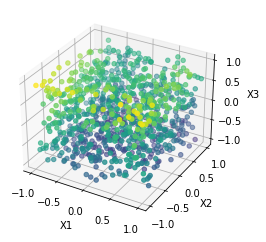

In [9]:
# Plot the predicted values using a 4D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_test, x2_test, x3_test, c=y_test.squeeze())
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

Using builtin layers

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# Define the equation for generating synthetic data
def generate_data(n):
  x1 = np.random.uniform(-1, 1, n)
  x2 = np.random.uniform(-1, 1, n)
  x3 = np.random.uniform(-1, 1, n)
  y = 3 * np.sin(x1) + 2 * np.cos(x2) + 4 * x3 + 0.5 * np.random.randn(n)
  return np.stack([x1, x2, x3], axis=1), y.reshape(-1, 1)


In [15]:
# Generate 1000 data points
X_train, y_train = generate_data(1000)

In [16]:
# Create the model using tensorflow builtin layers
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [17]:
# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam')

In [19]:
#Train the model for 100 epochs
history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [20]:
# Evaluate the model on the training data
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f'Training loss: {train_loss}')

Training loss: 0.23731690740585326


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


In [21]:
# Generate test data for plotting
x1_test = np.linspace(-1, 1, 20)
x2_test = np.linspace(-1, 1, 20)
x3_test = np.linspace(-1, 1, 20)
X_test = np.stack(np.meshgrid(x1_test, x2_test, x3_test), axis=-1).reshape(-1, 3)

In [22]:
# Predict the output for the test data
y_pred = model.predict(X_test).reshape(20, 20, 20)

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


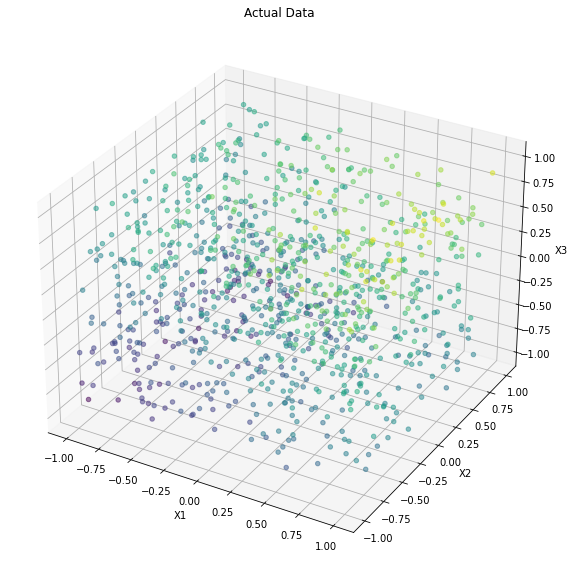

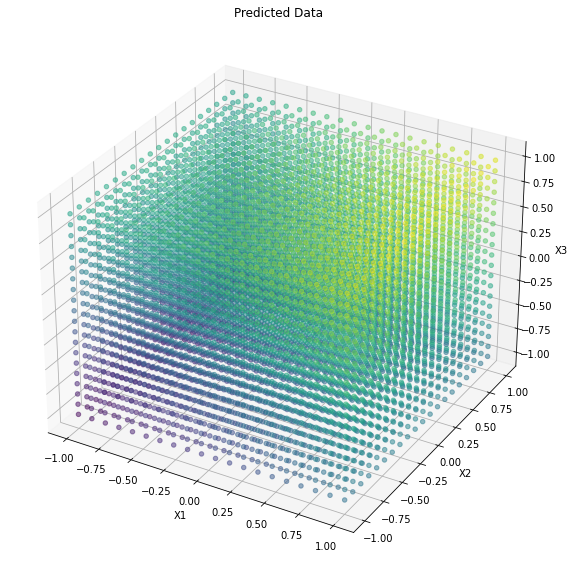

In [23]:
# Plot the predicted output in 4D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=y_train.reshape(-1), cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Actual Data')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=y_pred.reshape(-1), cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Predicted Data')
plt.show()

Using tensorflow functional API

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [25]:
# Define the equation for generating synthetic data
def generate_data(n):
  x1 = np.random.uniform(-1, 1, n)
  x2 = np.random.uniform(-1, 1, n)
  x3 = np.random.uniform(-1, 1, n)
  y = 3 * np.sin(x1) + 2 * np.cos(x2) + 4 * x3 + 0.5 * np.random.randn(n)
  return np.stack([x1, x2, x3], axis=1), y.reshape(-1, 1)

In [26]:
# Generate 1000 data points
X_train, y_train = generate_data(1000)

In [27]:
# Define the input layer
inputs = tf.keras.Input(shape=(3,))

In [28]:
# Define the hidden layers
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)

In [29]:
# Define the output layer
outputs = tf.keras.layers.Dense(1)(x)

In [30]:
# Create the model using the Functional API
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [31]:
# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam')

In [32]:
# Train the model for 100 epochs
history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [33]:
# Evaluate the model on the training data
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f'Training loss: {train_loss}')

Training loss: 0.22801684713363649


In [34]:
# Generate test data for plotting
x1_test = np.linspace(-1, 1, 20)
x2_test = np.linspace(-1, 1, 20)
x3_test = np.linspace(-1, 1, 20)
X_test = np.stack(np.meshgrid(x1_test, x2_test, x3_test), axis=-1).reshape(-1, 3)

In [35]:
# Predict the output for the test data
y_pred = model.predict(X_test).reshape(20,  20, 20)

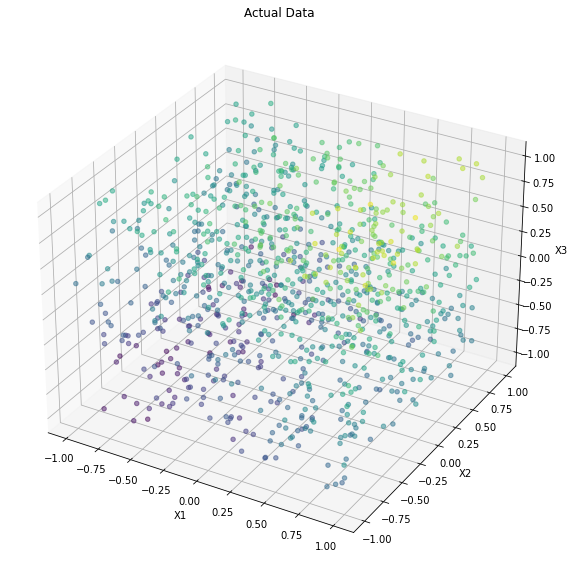

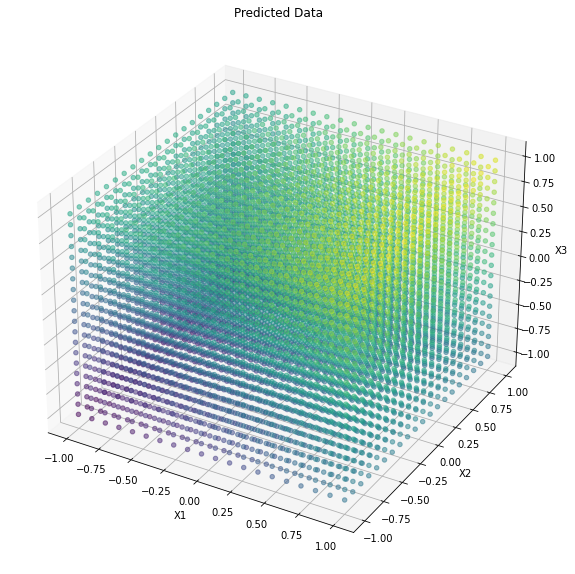

In [36]:
# Plot the predicted output in 4D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=y_train.reshape(-1), cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2') 
ax.set_zlabel('X3')
ax.set_title('Actual Data')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=y_pred.reshape(-1), cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Predicted Data')
plt.show()

 Using tensoflow high level API - Keras

In [37]:
# Define the model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [38]:
# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam')

In [39]:
# Train the model for 100 epochs
history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [40]:
# Evaluate the model on the training data
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f'Training loss: {train_loss}')

Training loss: 0.2422114364504814


In [41]:
# Predict the output for the test data
y_pred = model.predict(X_test).reshape(20, 20, 20)

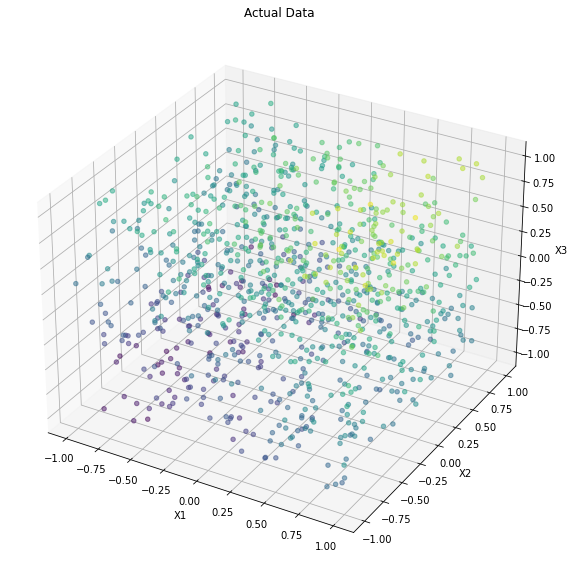

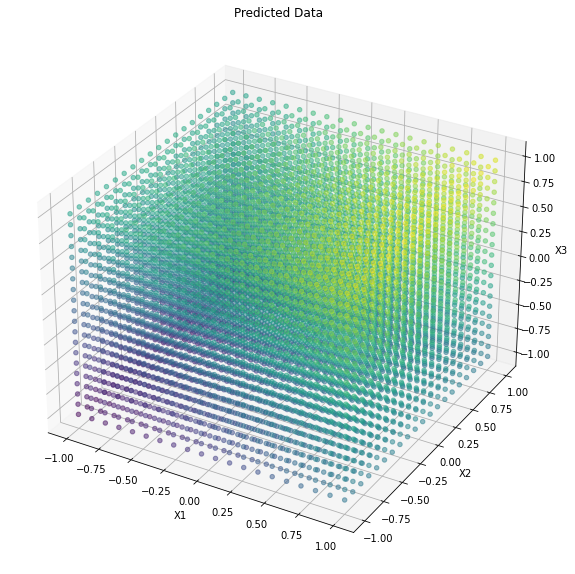

In [42]:
# Plot the predicted output in 4D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=y_train.reshape(-1), cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Actual Data')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=y_pred.reshape(-1), cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Predicted Data')
plt.show()